In [50]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

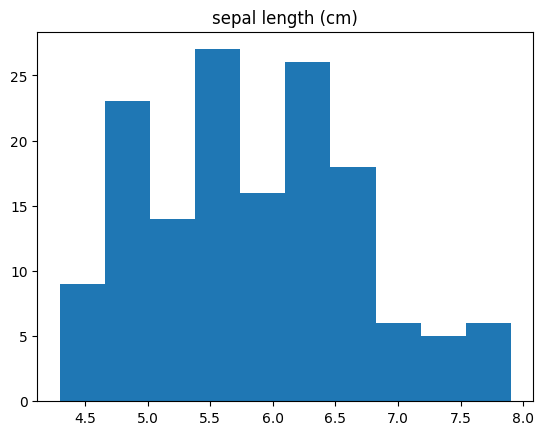

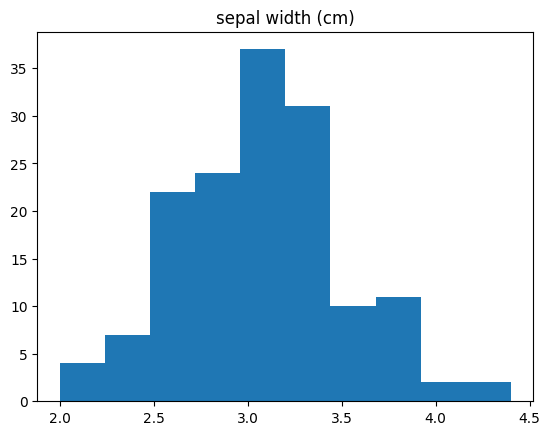

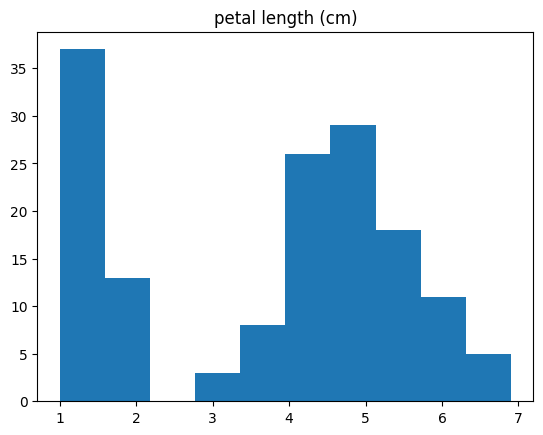

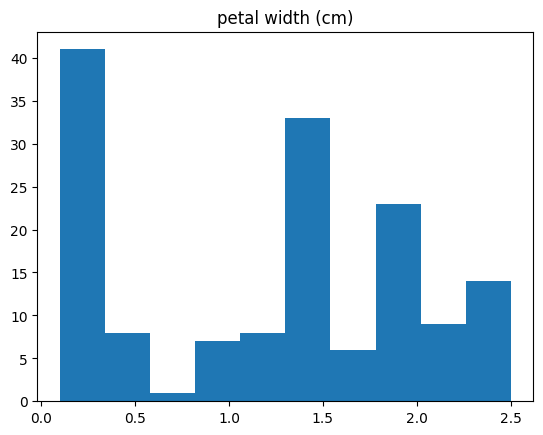

In [51]:
# Importing the dataset
iris = datasets.load_iris()

# Splitting the dataset into the Training set and Test set
X, y = iris.data, iris.target

# data cleaning

# data exploration
# plot the distribution of each feature

for i in range (X.shape[1]):
    plt.hist(X[:,i])
    plt.title(iris.feature_names[i])
    plt.show()


---
# Feature Scaling: Why do we need it?

Imagine you’re running a race with your friends, but some of you are wearing sneakers, and some are wearing heavy boots. Everyone has to run at the same time, but because of the different shoes, some friends are much slower than others.

Now, let’s say we give everyone the same kind of shoes. Suddenly, everyone is running at a similar speed, and the race is fair!

In the world of machine learning, the "shoes" are the features (the information we give to the computer to learn). Some features might be really big numbers (like income in dollars) and some might be small (like age in years). If one feature has much bigger numbers than another, the computer might pay more attention to it, just like if someone in heavy boots would slow down the race.

**Feature scaling** is like giving everyone the same kind of shoes, so the computer treats all features fairly and doesn’t get confused by big or small numbers.

### In the code you gave:
- `StandardScaler()` is like the tool that gives everyone the same kind of shoes.
- `fit_transform(X)` is the action of measuring everyone's shoe size (the numbers in your data), and then making all the numbers fair and similar.

So, when you scale your data, you're making sure everything is on an equal playing field for the computer to learn better!

---


In [52]:
# Feature Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 4)

In [53]:
# print the shape of the original dataset
print("X shape: ", X.shape)
print("y shape: ", y.shape)

# print the shape of the training and testing data
print("\nX_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X shape:  (150, 4)
y shape:  (150,)

X_train shape:  (120, 4)
X_test shape:  (30, 4)
y_train shape:  (120,)
y_test shape:  (30,)


In [54]:
# Data Cleaning
# check for missing values
print("Missing values: ", np.isnan(X).sum())


Missing values:  0


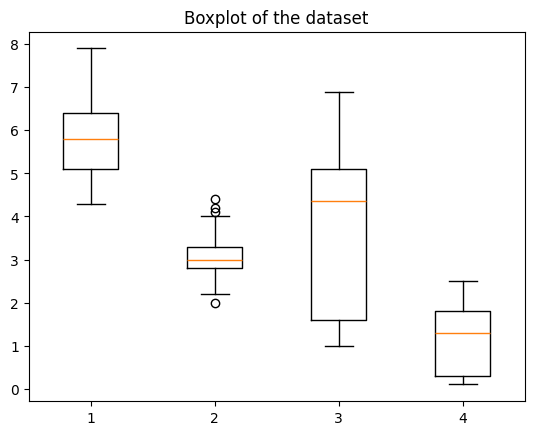

In [55]:
# Outlier Detection
# boxplot to visualize outliers
plt.boxplot(X)
plt.title("Boxplot of the dataset")
plt.show()

In [56]:
# Outlier Removal
def remove_outlier(data, threshold=2):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    outliers = np.abs((data - mean) / std) > threshold
    return data[~outliers.any(axis=1)] # return cleaned data

X_cleaned = remove_outlier(X)
y_cleaned = y[~np.any(np.abs((X - np.mean(X, axis=0)) / np.std(X, axis=0)) > 2, axis=1)]

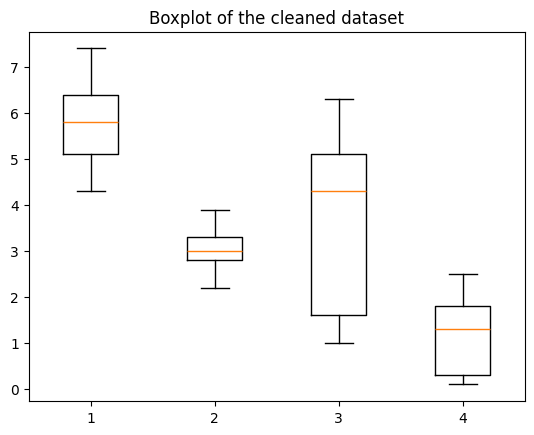

In [57]:
# boxplot to visualize outliers
plt.boxplot(X_cleaned)
plt.title("Boxplot of the cleaned dataset")
plt.show()

In [58]:
# Feature engineering ( Adding a new feature as a product of two features)
new_feature = X_cleaned[:,0] * X_cleaned[:,1]
X_fe = np.c_[X_cleaned, new_feature]

# print the shape of the original, scaled, cleaned and feature engineered dataset
print("X shape: ", X.shape)
print("X_scaled shape: ", X_scaled.shape)
print("X_cleaned shape: ", X_cleaned.shape)
print("X_fe shape: ", X_fe.shape)

# y and y_cleaned shape
print("y shape: ", y.shape)
print("y_cleaned shape: ", y_cleaned.shape)

X shape:  (150, 4)
X_scaled shape:  (150, 4)
X_cleaned shape:  (139, 4)
X_fe shape:  (139, 5)
y shape:  (150,)
y_cleaned shape:  (139,)


---

Imagine you have a big box of colorful LEGO blocks. These blocks represent your data, and you want to build something cool, but there are so many blocks, it's hard to see the big picture.

Now, let’s say you want to figure out the best way to organize your blocks. If you look carefully, you might notice that most of the blocks are stacked in certain directions, like straight lines or piles. Some directions are filled with many blocks, while others have just a few.

**PCA** is like finding the most important directions (the ones with the most blocks in them) and focusing on those. You can then **ignore the directions that don’t matter much** (the ones with fewer blocks), and this makes it easier to understand and work with your blocks.

In short:
- PCA helps you **simplify** a big mess of data by finding the most important parts.
- It’s like organizing your blocks in the best possible way so you can see the main shape without all the extra stuff.

Does that make sense?

---

In [59]:
# dimensionality reduction (PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # reduce to 2 dimensions
X_pca = pca.fit_transform(X_fe) # fit and transform the data

In [60]:
# Print the shape of the original, scaled, cleaned, feature engineered and PCA dataset
print("X shape: ", X.shape)
print("X_scaled shape: ", X_scaled.shape)
print("X_cleaned shape: ", X_cleaned.shape)
print("X_fe shape: ", X_fe.shape)
print("X_pca shape: ", X_pca.shape)

# y and y_cleaned shape
print("\ny shape: ", y.shape)
print("y_cleaned shape: ", y_cleaned.shape)

X shape:  (150, 4)
X_scaled shape:  (150, 4)
X_cleaned shape:  (139, 4)
X_fe shape:  (139, 5)
X_pca shape:  (139, 2)

y shape:  (150,)
y_cleaned shape:  (139,)


In [61]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_cleaned, test_size = 0.2, random_state = 4)

# print the shape of the training and testing data
print("\nX_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

# print the shape of the training and testing data
print("\ny_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)


X_train shape:  (111, 2)
X_test shape:  (28, 2)

y_train shape:  (111,)
y_test shape:  (28,)


In [ ]:
# Plot PCA-transformed data